In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn 
import sklearn.mixture as mix 

Testing a small universe of the 10Y Treasury, an Oil ETF, and Tech ETF 

In [2]:
assetlist = [ 'IEF', 'GSG', 'IXN' ]
num_components = 10

Create the subset of assets.

In [3]:
m6 = pd.read_csv('./data/assets_m6.csv')
m6_subset = pd.DataFrame()

for sym in assetlist: 
    m6_subset[sym] = m6[m6['symbol'] == sym]['price'].values

1st-order differencing of the rolling average expectation for each asset. 

In [4]:
m6_subset = m6_subset.apply(np.log).rolling(10).mean().diff().dropna()
print(m6_subset)

          IEF       GSG       IXN
10  -0.001878  0.004799 -0.004710
11  -0.002042  0.002259 -0.002013
12  -0.002037  0.001592 -0.002763
13  -0.001077  0.001889 -0.002938
14   0.000018  0.000861 -0.004356
..        ...       ...       ...
194  0.000290  0.005585 -0.001463
195 -0.000286  0.003399 -0.002283
196 -0.000453 -0.001500 -0.002852
197  0.001061 -0.000679  0.006195
198  0.001369  0.001982  0.004565

[189 rows x 3 columns]


Instantiate a non-parametric clustering model using the dirichlet process. 

In [5]:
dpgmm_model = mix.BayesianGaussianMixture(n_components=num_components, weight_concentration_prior_type='dirichlet_process').fit(m6_subset)

In [6]:
states = dpgmm_model.predict(m6_subset)

state_counts = np.zeros(num_components)
for M in states:
  state_counts[M] += 1 

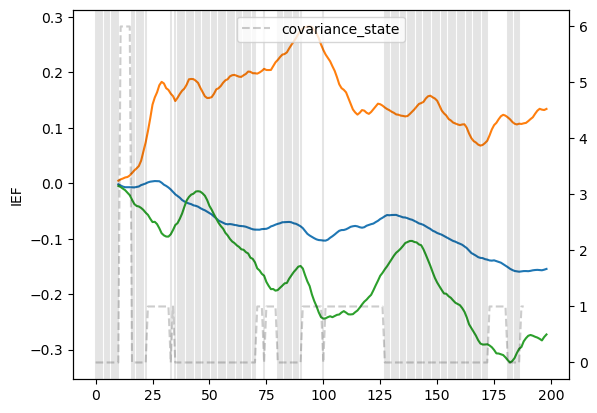

In [7]:
fig,ax = plt.subplots()
axx = ax.twinx()

sns.lineplot(data=states, ax=axx, linestyle='--', color='black', alpha=0.2, label='covariance_state')
sns.lineplot(data=m6_subset['IEF'].cumsum(), ax=ax)
sns.lineplot(data=m6_subset['GSG'].cumsum(), ax=ax)
sns.lineplot(data=m6_subset['IXN'].cumsum(), ax=ax)

for M in range(len(states)): 
  if states[M] == np.argmax(state_counts): 
    axx.axvline(M, color='black', alpha=0.1)

axx.legend(loc=0)
plt.show()

In [8]:

print(dpgmm_model.means_)
print(state_counts)

[[-1.31419955e-03  9.09909662e-04 -4.36339208e-03]
 [-2.98508635e-07 -1.13999939e-03  4.55965523e-03]
 [-8.20065752e-04  7.19172262e-04 -1.44452116e-03]
 [-8.19494799e-04  7.17433270e-04 -1.44416653e-03]
 [-8.19039776e-04  7.16046915e-04 -1.44388306e-03]
 [-8.18675427e-04  7.14936523e-04 -1.44365554e-03]
 [ 8.72306878e-04  1.64104488e-02 -4.46927435e-03]
 [-8.17131882e-04  7.10229236e-04 -1.44268631e-03]
 [-8.17131827e-04  7.10229069e-04 -1.44268627e-03]
 [-8.17131827e-04  7.10229069e-04 -1.44268627e-03]]
[120.  64.   0.   0.   0.   0.   5.   0.   0.   0.]
